In [219]:
%load_ext autoreload
%autoreload 2


from util import *
from another_thing import algorithm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [220]:

problem_file = 'STAGE1_5.json'
# problem_file = "TEST_K50_1.json"
timelimit = 30

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Initial sorted orders: [17, 26, 31, 2, 38, 40, 41, 5, 10, 12, 13, 45, 46, 14, 15, 16, 18, 58, 33, 65, 35, 3, 4, 39, 6, 7, 73, 9, 11, 75, 84, 20, 23, 56, 27, 32, 63, 0, 34, 1, 37, 103, 69, 43, 8, 44, 118, 50, 19, 52, 53, 21, 86, 91, 28, 29, 57, 61, 138, 104, 67, 68, 74, 77, 78, 79, 153, 83, 85, 123, 125, 159, 25, 87, 90, 131, 30, 94, 97, 62, 174, 100, 143, 177, 178, 105, 106, 108, 148, 70, 72, 42, 111, 76, 112, 113, 115, 116, 47, 48, 82, 120, 156, 54, 122, 55, 24, 126, 127, 130, 92, 132, 134, 96, 60, 135, 98, 137, 167, 140, 99, 141, 36, 101, 142, 66, 144, 102, 145, 146, 109, 71, 110, 149, 183, 117, 49, 51, 185, 124, 186, 88, 161, 89, 128, 162, 129, 205, 93, 133, 59, 164, 136, 168, 169, 64, 171, 172, 175, 147, 107, 192, 181, 114, 80, 154, 81, 201, 121, 22, 221, 160, 223, 187, 163, 208, 165, 166, 170, 212, 176, 190, 191, 150, 151, 196, 182, 237, 200, 119, 155, 202, 203, 224, 204, 206, 244, 188, 209, 139, 189, 230, 231, 214, 215, 194, 180, 195, 152, 235, 197, 198, 199, 219, 220, 184, 157, 

{'feasible': False,
 'infeasibility': "Bundle's total volume exceeds the rider's capacity!: 81 > 70",
 'bundles': [['BIKE', [17, 87, 78], [17, 78, 87]],
  ['BIKE', [26, 106], [26, 106]],
  ['BIKE', [31, 1, 6, 76], [31, 6, 1, 76]],
  ['BIKE', [2, 37, 153, 8], [2, 8, 37, 153]],
  ['BIKE', [38, 118, 30, 62], [38, 118, 30, 62]],
  ['BIKE', [40, 90], [40, 90]],
  ['BIKE', [41, 63, 15], [15, 41, 63]],
  ['BIKE', [5, 42, 67], [5, 67, 42]],
  ['BIKE', [10, 23, 94], [10, 23, 94]],
  ['BIKE', [12, 33, 45, 73], [12, 33, 45, 73]],
  ['BIKE', [13, 57, 167], [13, 57, 167]],
  ['BIKE', [46, 11, 120], [46, 11, 120]],
  ['BIKE', [14, 104, 111], [14, 104, 111]],
  ['BIKE', [16, 55], [16, 55]],
  ['BIKE', [18, 7, 0], [18, 7, 0]],
  ['BIKE', [58, 43, 68, 110], [58, 43, 68, 110]],
  ['BIKE', [65, 39, 21], [65, 39, 21]],
  ['BIKE', [35, 24, 117, 60], [35, 60, 117, 24]],
  ['BIKE', [3, 83, 99, 145], [3, 83, 145, 99]],
  ['BIKE', [4, 146], [4, 146]],
  ['BIKE', [9, 52, 96], [52, 9, 96]],
  ['BIKE', [75, 135],

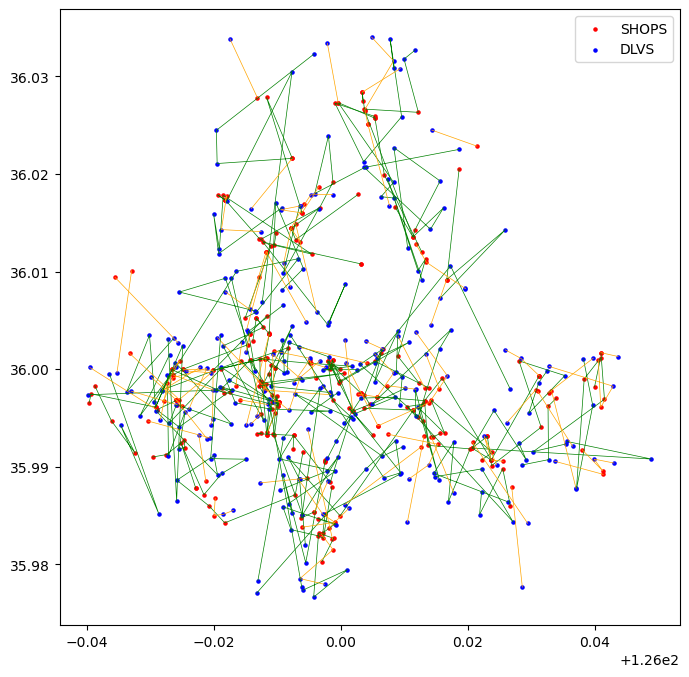

In [221]:
draw_route_solution(ALL_ORDERS, checked_solution)

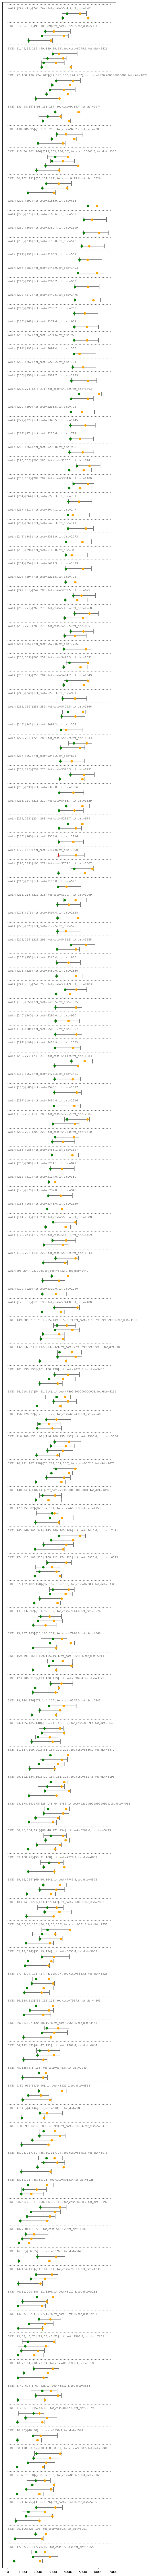

In [222]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)